In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG', 'GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2017-1-1')

In [3]:
assets = ['T', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2017-1-1')['Adj Close']
pf_data.tail()

,T,^GSPC
Date,,
2020-05-14,28.580000,2852.500000
2020-05-15,28.309999,2863.699951
2020-05-18,29.450001,2953.909912
2020-05-19,28.959999,2922.939941
2020-05-20,29.590000,2971.610107


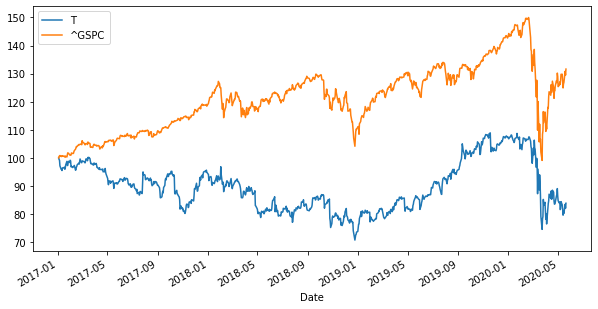

In [4]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
# average
log_returns.mean() * 250

T       -0.051811
^GSPC    0.080794
dtype: float64

In [7]:
# covariance
log_returns.cov() * 250

,T,^GSPC
T,0.063460,0.034635
^GSPC,0.034635,0.043462


In [8]:
# correlation matrices
log_returns.corr()

,T,^GSPC
T,1.000000,0.659484
^GSPC,0.659484,1.000000


In [9]:
num_assets = len(assets)

In [10]:
#verify the number of assets
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.29957407, 0.99162263])

In [12]:
arr[0] + arr [1]

1.2911967035489982

In [13]:
# Obtain two randomly generated weights whose sum will always equal one
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.35001884, 0.64998116])

In [14]:
weights[0] + weights[1]

1.0

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.03437962367346553

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20468418570539593

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20468418570539593

In [19]:
# Create two lists of randomly generated expected returns:
pfolio_returns = []
pfolio_volatilities = []

# Create a loop that is set to randomly generate two weights:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([-0.024923190998466984,
  0.027917718356584006,
  0.026884425144282964,
  -0.049013459862714284,
  0.07866135012167175,
  0.020434737758314028,
  0.026683238952355377,
  -0.025353286311992365,
  0.020274799561975983,
  -0.01609878735339762,
  0.05304847306452507,
  0.01029885240617046,
  0.014338412951830012,
  0.021861141902926044,
  -0.025620956444811896,
  -0.0023702727288905435,
  0.04443393639970392,
  -0.0068037598211681885,
  0.022107724781273395,
  0.015771512766677195,
  -0.024978336881744608,
  -0.007460153944002921,
  0.0012290429798613737,
  0.031138211668185204,
  0.043155251510478915,
  -0.008543220058936412,
  0.049315725303982684,
  0.0528548707668136,
  -0.040766332737726944,
  0.054239431398036574,
  -0.011122439381390422,
  0.012706367312688413,
  -0.04161600259453508,
  0.07472686164329294,
  -0.04131687450455437,
  0.02311247460986653,
  -0.038852563104100464,
  0.025958590952666276,
  0.07974979693846503,
  0.032301652801361776,
  0.030159595276912338,
  -0.02446